Fabian Rodriguez - 
Sergio Ardila - 
Juan Camilo Marín - 
Julián Velásquez

# Exercise 05


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

In [1]:
import pandas as pd
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
df = pd.read_csv(r'C:\Users\juanv\Documents\MIIA\7. Modelos Avanzados para el analisis de datos 1\AdvancedMethodsDataAnalysisClass-master\datasets\example_retail_sales.csv')

In [2]:
df.head()
df.tail()

,ds,y
288,2016-01-01,400928
289,2016-02-01,413554
290,2016-03-01,460093
291,2016-04-01,450935
292,2016-05-01,471421


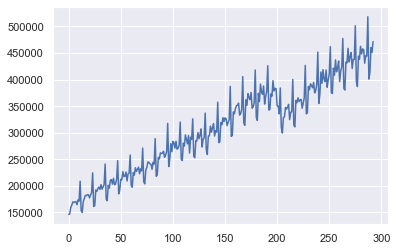

In [3]:
df['y'].plot();

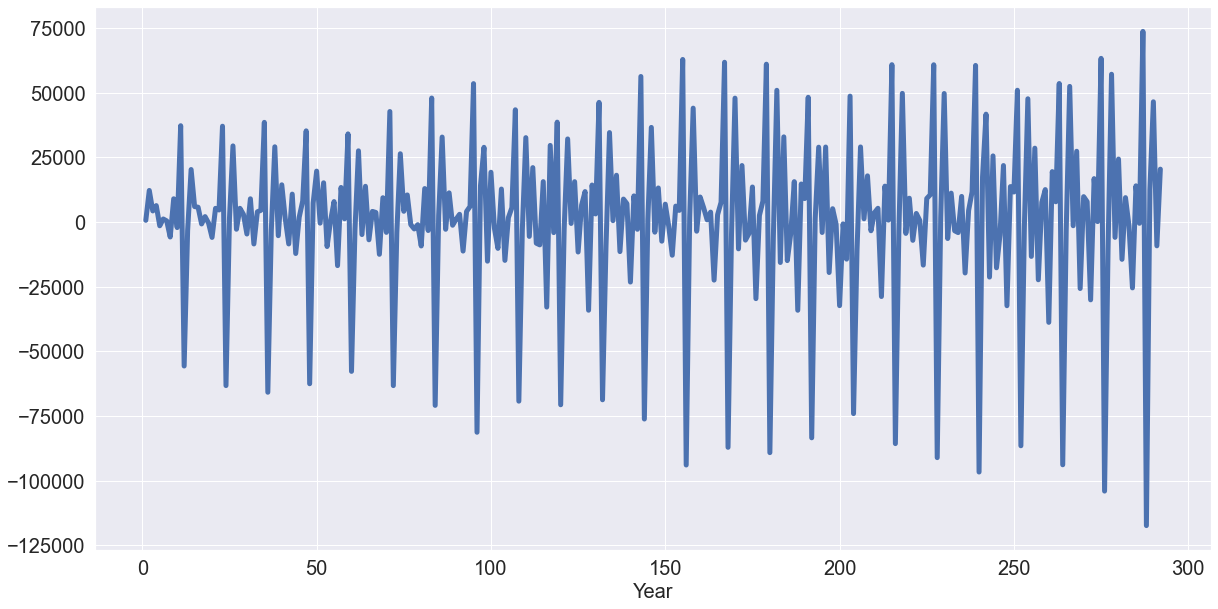

In [4]:
df['y'].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

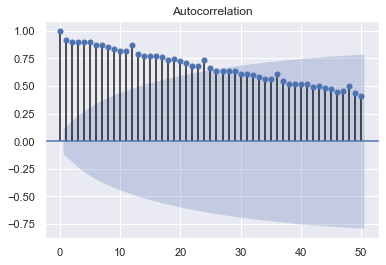

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['y'], lags=50);

In [6]:
# Realizamos una copia del DataFrame para después realizar el forecast sin la estandarización de los datos.
df2 = df.copy()

In [7]:
df['y'] = np.log(df['y'])

In [8]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

Importing plotly failed. Interactive plots will not work.


In [9]:
X = df
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
#history = [x for x in train]
predictions = list()

In [10]:
train.tail()

,ds,y
258,2013-07-01,12.953606
259,2013-08-01,12.982986
260,2013-09-01,12.889672
261,2013-10-01,12.937815
262,2013-11-01,12.956571


In [11]:
test.tail()

,ds,y
288,2016-01-01,12.901537
289,2016-02-01,12.932543
290,2016-03-01,13.039184
291,2016-04-01,13.019078
292,2016-05-01,13.063507


In [12]:
list(df)

['ds', 'y']

In [13]:
for t in range(len(test)):
    m = Prophet()
    m.fit(train)
    future = m.make_future_dataframe(periods= 1, freq='M')
    forecast = m.predict(future)
    
    pretrain = forecast[['ds', 'yhat']]
    pretrain.columns = ['ds','y']
    train = train.append(pretrain.iloc[-1])
    
    obs = forecast.iloc[-1]
    predictions.append(obs['yhat'])
    train.loc[size + t] = test.iloc[t]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [14]:
future = m.make_future_dataframe(periods= 6, freq='M')
forecast = m.predict(future)

In [15]:
train.tail()

,ds,y
288,2016-01-01,12.901537
289,2016-02-01,12.932543
290,2016-03-01,13.039184
291,2016-04-01,13.019078
292,2016-05-01,13.063507


In [16]:
pretrain

,ds,y
0,1992-01-01,11.874181
1,1992-02-01,11.890590
2,1992-03-01,12.009790
3,1992-04-01,11.997912
4,1992-05-01,12.057217
...,...,...
288,2016-01-01,12.914499
289,2016-02-01,12.927550
290,2016-03-01,13.043610
291,2016-04-01,13.028375


In [17]:
test['yhat'] = predictions
test

C:\Users\juanv\Anaconda3\envs\Prophet\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ds,y,yhat
263,2013-12-01,13.075701,13.127264
264,2014-01-01,12.856832,12.859873
265,2014-02-01,12.848755,12.893452
266,2014-03-01,12.978045,12.975426
267,2014-04-01,12.974826,12.967810
268,2014-05-01,13.036418,13.018750
269,2014-06-01,12.978844,13.025080
270,2014-07-01,13.001336,13.011252
271,2014-08-01,13.019030,13.042763
272,2014-09-01,12.950082,12.969681


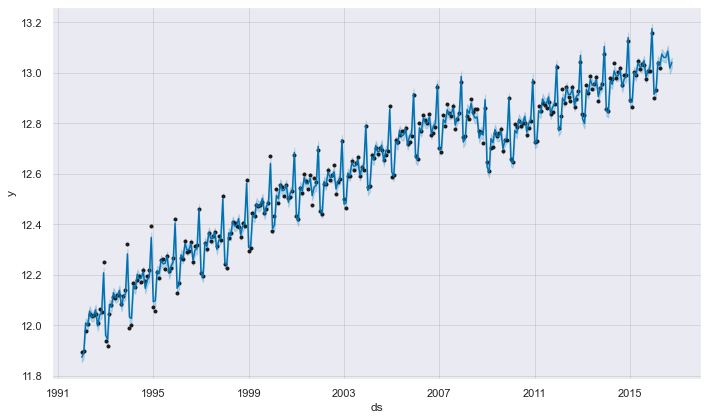

In [18]:
fig1 = m.plot(forecast)

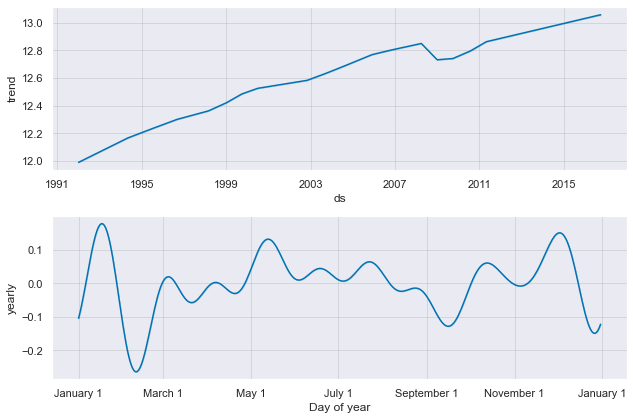

In [19]:
m.plot_components(forecast);

Podemos ver una tendencia creciente, lo cuál es bueno ya que indica mayores niveles de ventas a través de los años.

In [20]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['y'], test['yhat']) ** 0.5
print('Test MSE: %.3f' % error)

Test MSE: 0.026


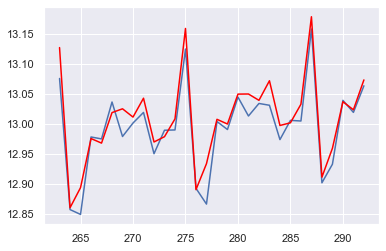

In [21]:
plt.plot(test["y"])
plt.plot(test["yhat"], color='red')
plt.show()

### Ahora realizamos el ajuste del modelo sin hacer la estandarización logarítmica

In [22]:
df2.tail()

,ds,y
288,2016-01-01,400928
289,2016-02-01,413554
290,2016-03-01,460093
291,2016-04-01,450935
292,2016-05-01,471421


In [23]:
X = df2
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
#history = [x for x in train]
predictions = list()

In [24]:
for t in range(len(test)):
    m = Prophet()
    m.fit(train)
    future = m.make_future_dataframe(periods= 1, freq='M')
    forecast = m.predict(future)
    
    pretrain = forecast[['ds', 'yhat']]
    pretrain.columns = ['ds','y']
    train = train.append(pretrain.iloc[-1])
    
    obs = forecast.iloc[-1]
    predictions.append(obs['yhat'])
    train.loc[size + t] = test.iloc[t]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [25]:
future = m.make_future_dataframe(periods= 6, freq='M')
forecast = m.predict(future)

In [26]:
test['yhat'] = predictions

C:\Users\juanv\Anaconda3\envs\Prophet\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


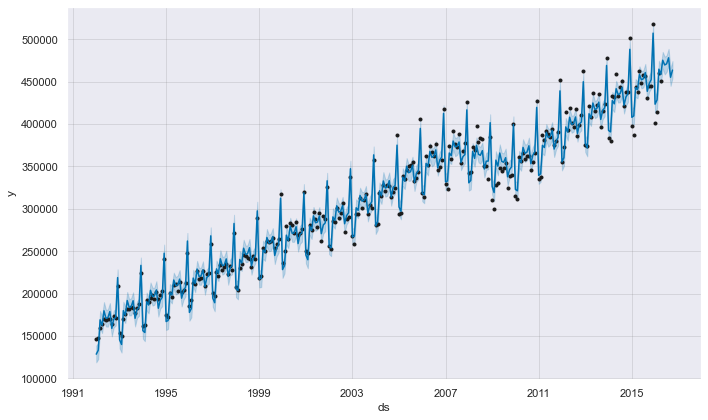

In [27]:
fig1 = m.plot(forecast)

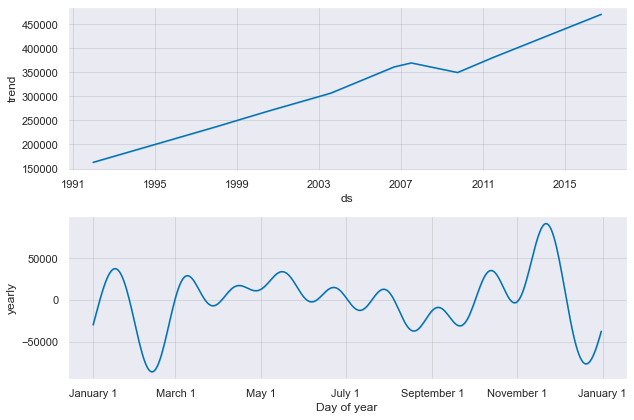

In [28]:
m.plot_components(forecast);

Podemos ver una tendencia creciente, lo cuál es bueno ya que indica mayores niveles de ventas a través de los años.

In [29]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['y'], test['yhat']) ** 0.5
print('Test MSE: %.3f' % error)

Test MSE: 13771.361


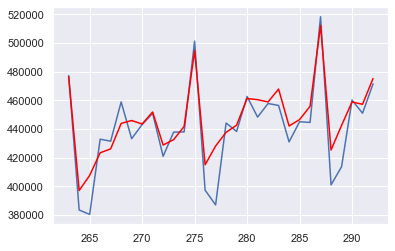

In [30]:
plt.plot(test["y"])
plt.plot(test["yhat"], color='red')
plt.show()

En conclusión, podemos ver que al hacer la transformación logarítmica obtenemos un MSE menor en comparación con los datos sin ningún tipo de transformación. Esto debe a que la transformación estabiliza la media y la varianza, por lo cual el modelo al realizar las predicciones es más preciso.